# **World Happiness Report Project**

**Project Discription**:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor


**Loading Dataset**

In [2]:
df = pd.read_csv("World_Happiness_report.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


I downloaded the entire dataset on my local computer from https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
    and then imported to jupiter notebook

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
#Rows and columns 
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 158   Number of columns: 12


As we can see that the DataSet has 158 rows and 12 Columns.

# Exploratory Data Analysis (EDA)

In [9]:
df.shape

(158, 12)

In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no Null values present in dataset.

In [7]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

**Observation:**

* There are no null values present in the dataset
* There are 3 dtypes present in the dataset and those are float, int, object

In [11]:
# checking unique values
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

**Observation:**
* There are 10 unique values are present in region column And Other Columns have 150+ unique values.

**Separating Numerical and Categorical Columns**

In [12]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['Country', 'Region']


In [14]:
#value counts of region column
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

As "Region" column has only 10 unique values, we check each unique value count.

In [15]:
# General statistical description of Numerical variables
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [17]:
# Create a list to store the predicted happiness category
happiness = []
for score in df['Happiness Score']:
    if score < 4:
        happiness.append("UNHAPPY")
    elif score >= 4 and score <= 6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

pred_happiness = pd.DataFrame(happiness, columns=["Predicted_Happiness"])
pred_happiness = pred_happiness.astype('category')
data = pd.concat([df, pred_happiness], axis=1)

In [18]:
# value counts
data['Predicted_Happiness'].value_counts()

NORMAL     93
HAPPY      44
UNHAPPY    21
Name: Predicted_Happiness, dtype: int64

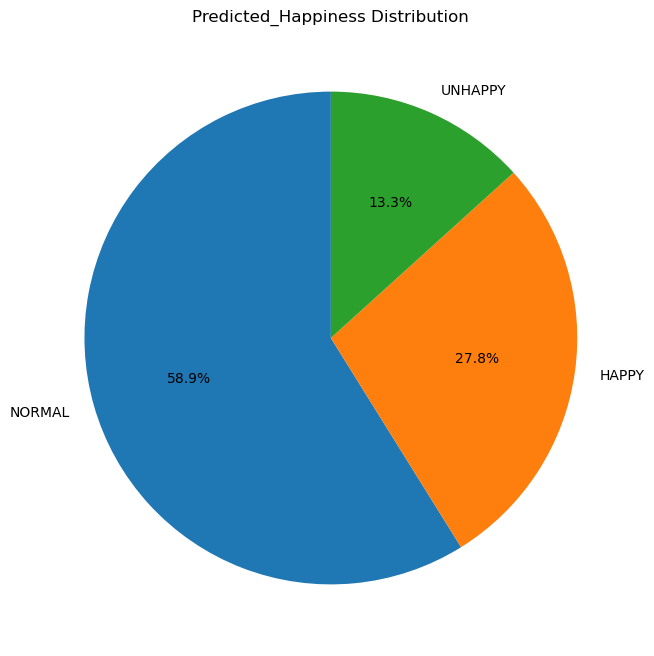

In [19]:
# Calculate the distribution of happiness scores
happiness_counts = data['Predicted_Happiness'].value_counts()

happiness_scores = happiness_counts.index
happiness_counts = happiness_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(happiness_counts, labels=happiness_scores, autopct='%1.1f%%', startangle=90)
plt.title('Predicted_Happiness Distribution')
plt.show()

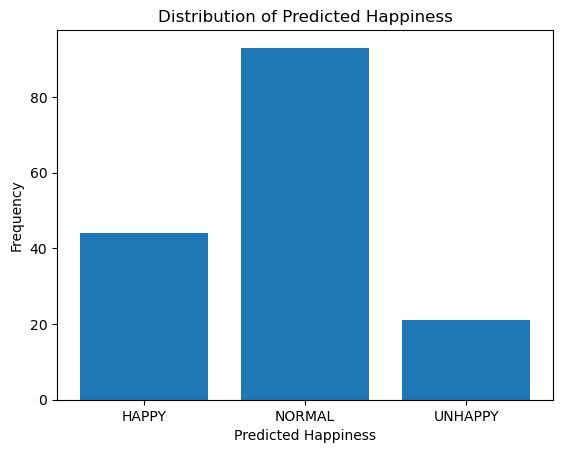

In [20]:
countries = data['Country']
predicted_happiness = data['Predicted_Happiness']
category_counts = {}
for happiness in predicted_happiness:
    if happiness not in category_counts:
        category_counts[happiness] = 0
    category_counts[happiness] += 1

categories = list(category_counts.keys())
frequencies = list(category_counts.values())

# Plot the histogram
plt.bar(categories, frequencies)
plt.xlabel('Predicted Happiness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Happiness')
plt.show()

**Observation:**

* By observing pie plot and bar plot it is clear that the number of Countries that has Happiness as "Normal" are highest.

**Bar plot for top 5 happiest countries**

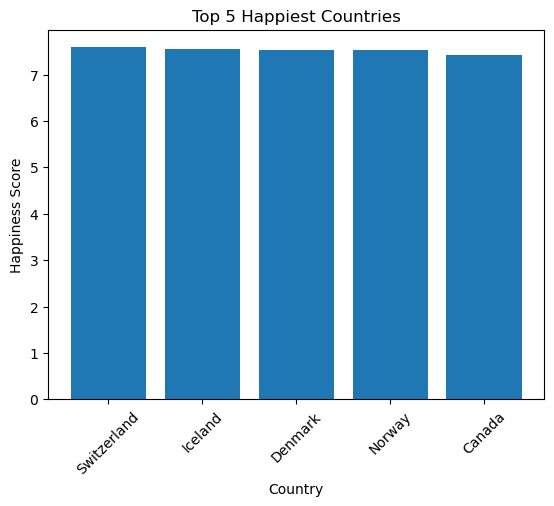

In [22]:
top_5_countries = data.sort_values('Happiness Score', ascending=False).head(5)
plt.bar(top_5_countries['Country'], top_5_countries['Happiness Score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries')
plt.xticks(rotation=45)
plt.show()

**Observation:**

* Switzerland is the happiest country in the world.

**Bar plot for least happy countries**

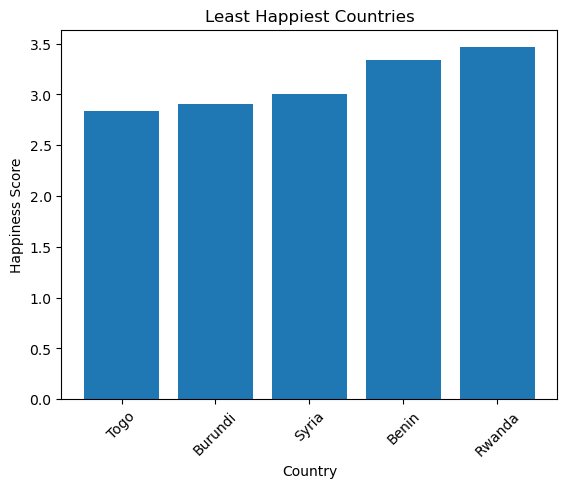

In [25]:
top_5_countries = data.sort_values('Happiness Score', ascending=True).head(5)
plt.bar(top_5_countries['Country'], top_5_countries['Happiness Score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Least Happiest Countries')
plt.xticks(rotation=45)
plt.show()

**Ovservation:**

* Togo has the lowest happiness score so we can say that togo is the most unhappy country.

**Dropping columns that are not contributing towards target label prediction**

In [28]:
data = data.drop(['Country', 'Region', 'Happiness Rank','Predicted_Happiness'], axis=1)

**Observation:**

* Here we have successfully removed the categorical columns 'Country', 'Region' and 'Predicted_Happiness' along with the 'Happiness Rank' which was just a list of sequential numeric data.

In [30]:
data.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


**Drawing Pair plot**

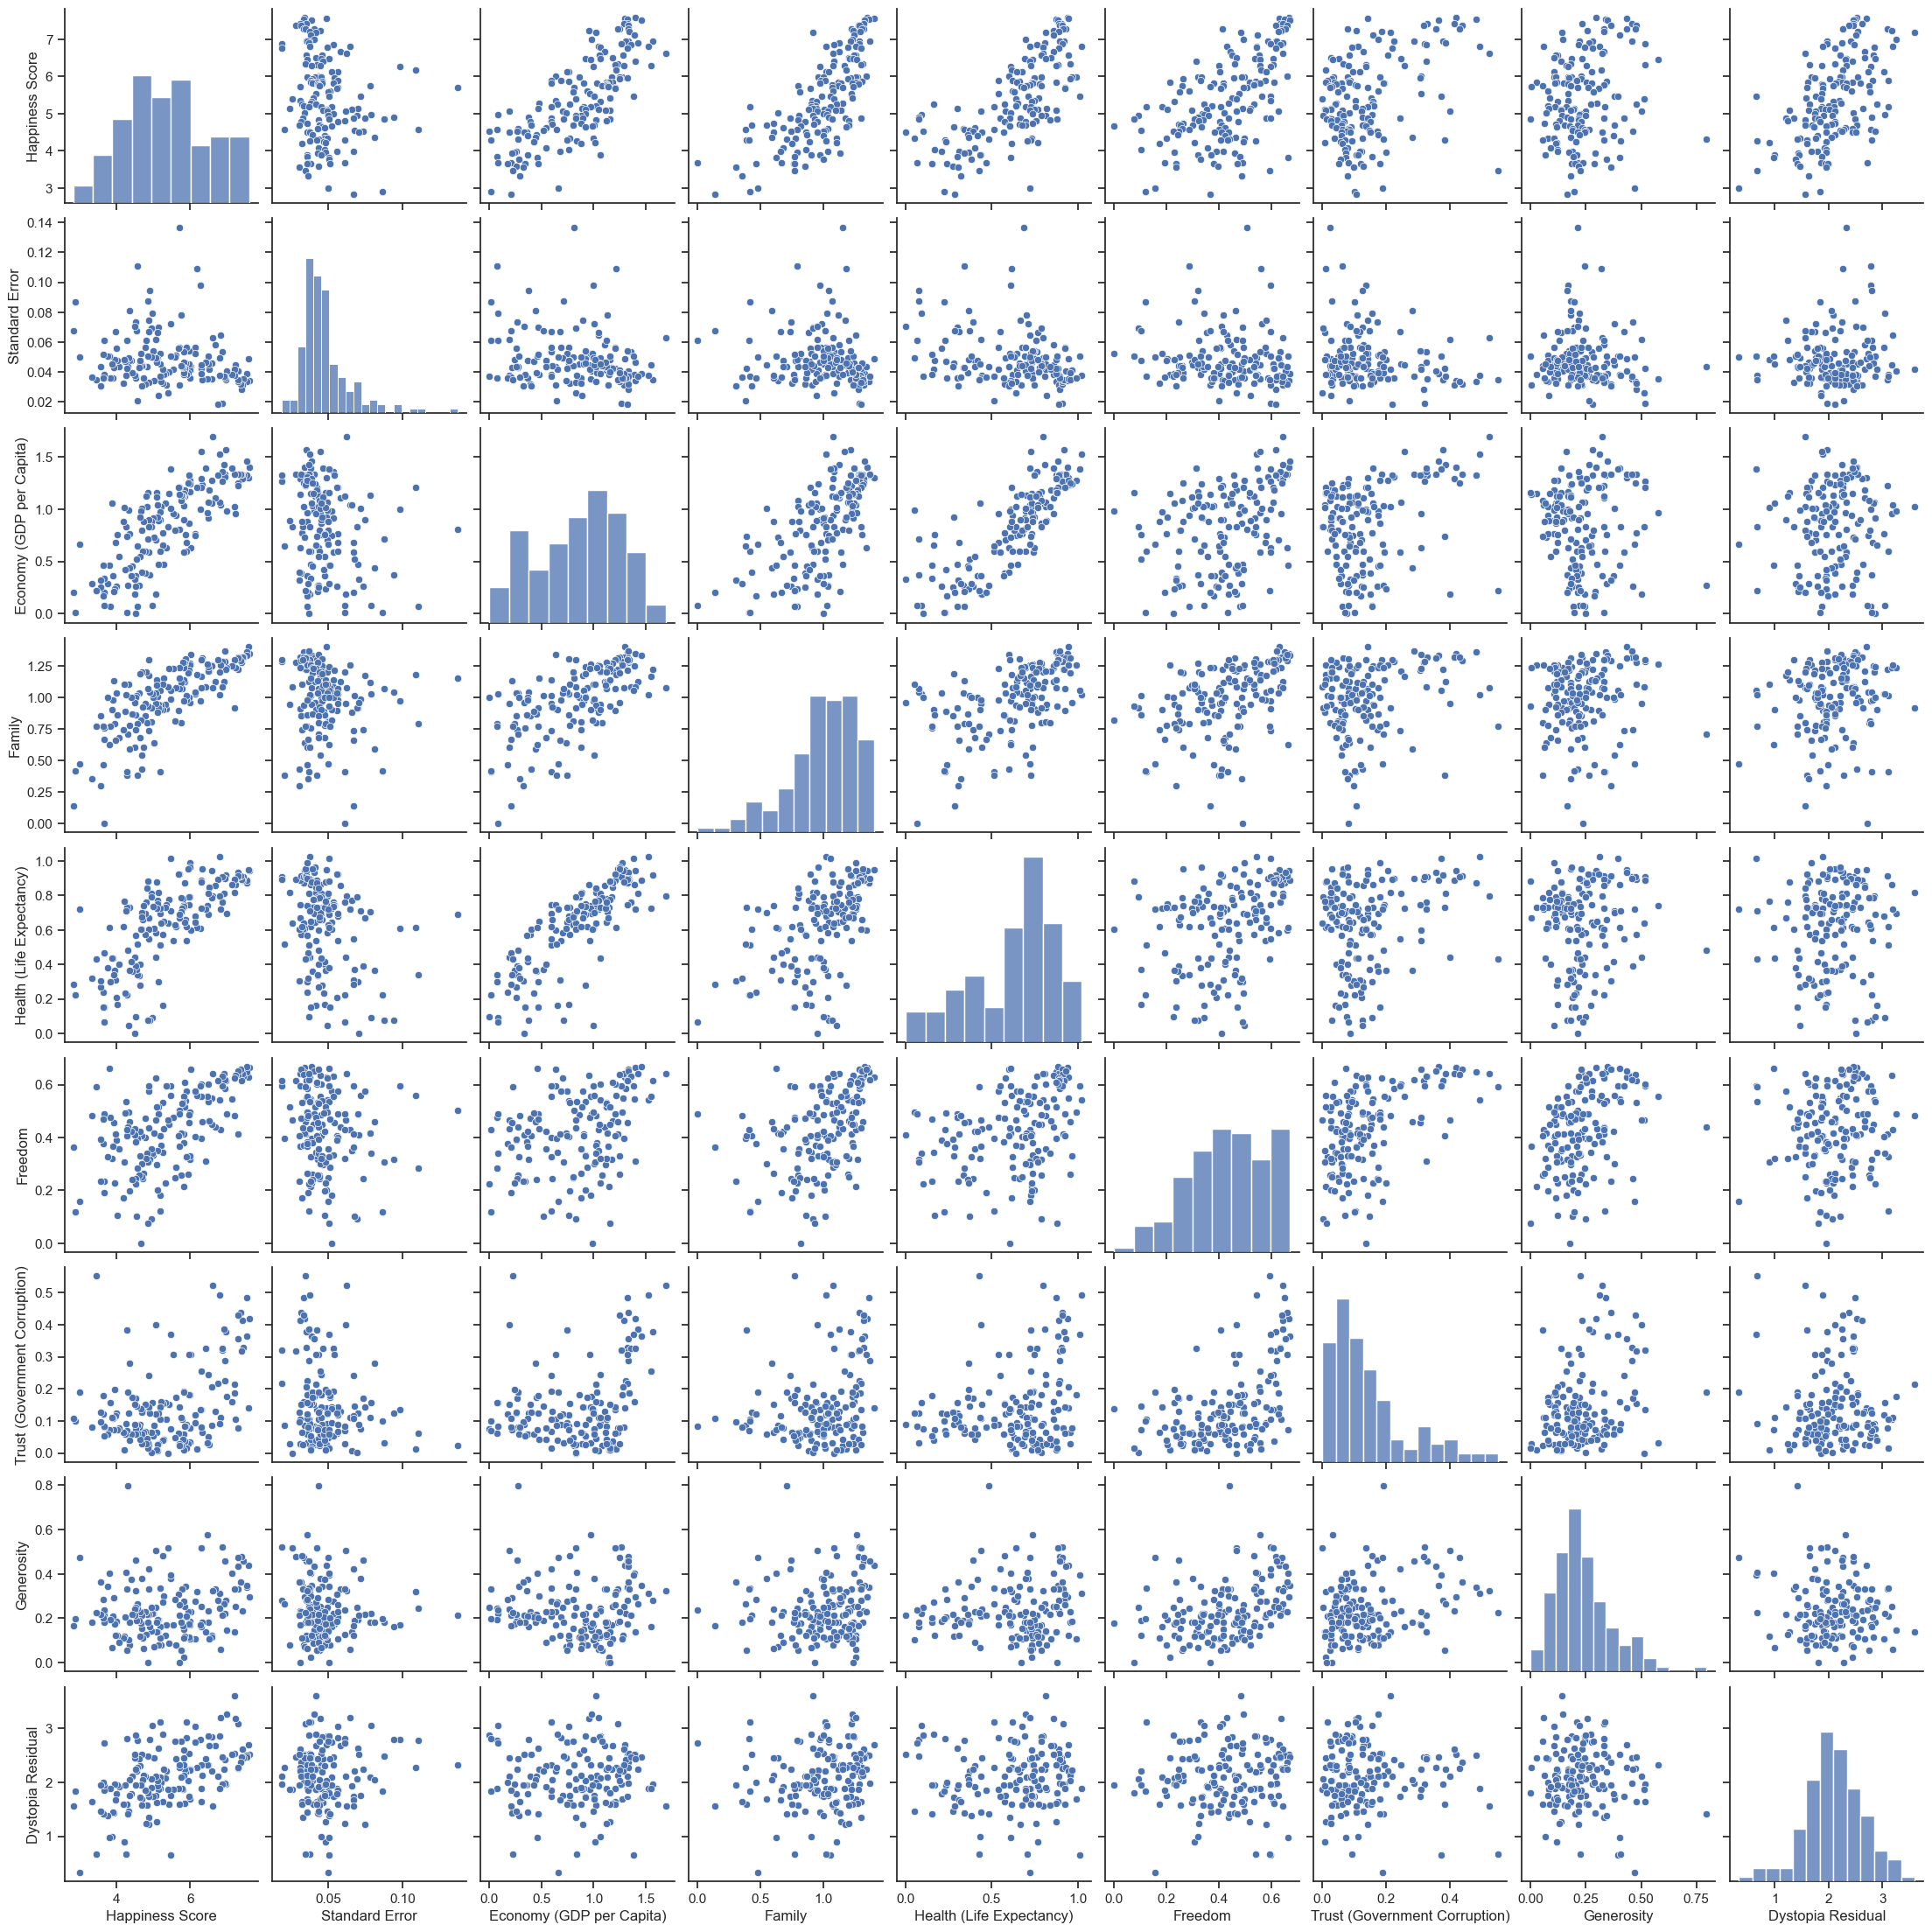

In [31]:
sns.set(style='ticks')
sns.pairplot(data,palette='hsv')
plt.show()

We have used this pairplot basically to take a picturization on both scatter plot + histogram and see how the data distribution looks like. However the labels are quite tiny and we would also want to take a closer look at the skewness so going to extract the Histogram information.

**Drawing Histogram**

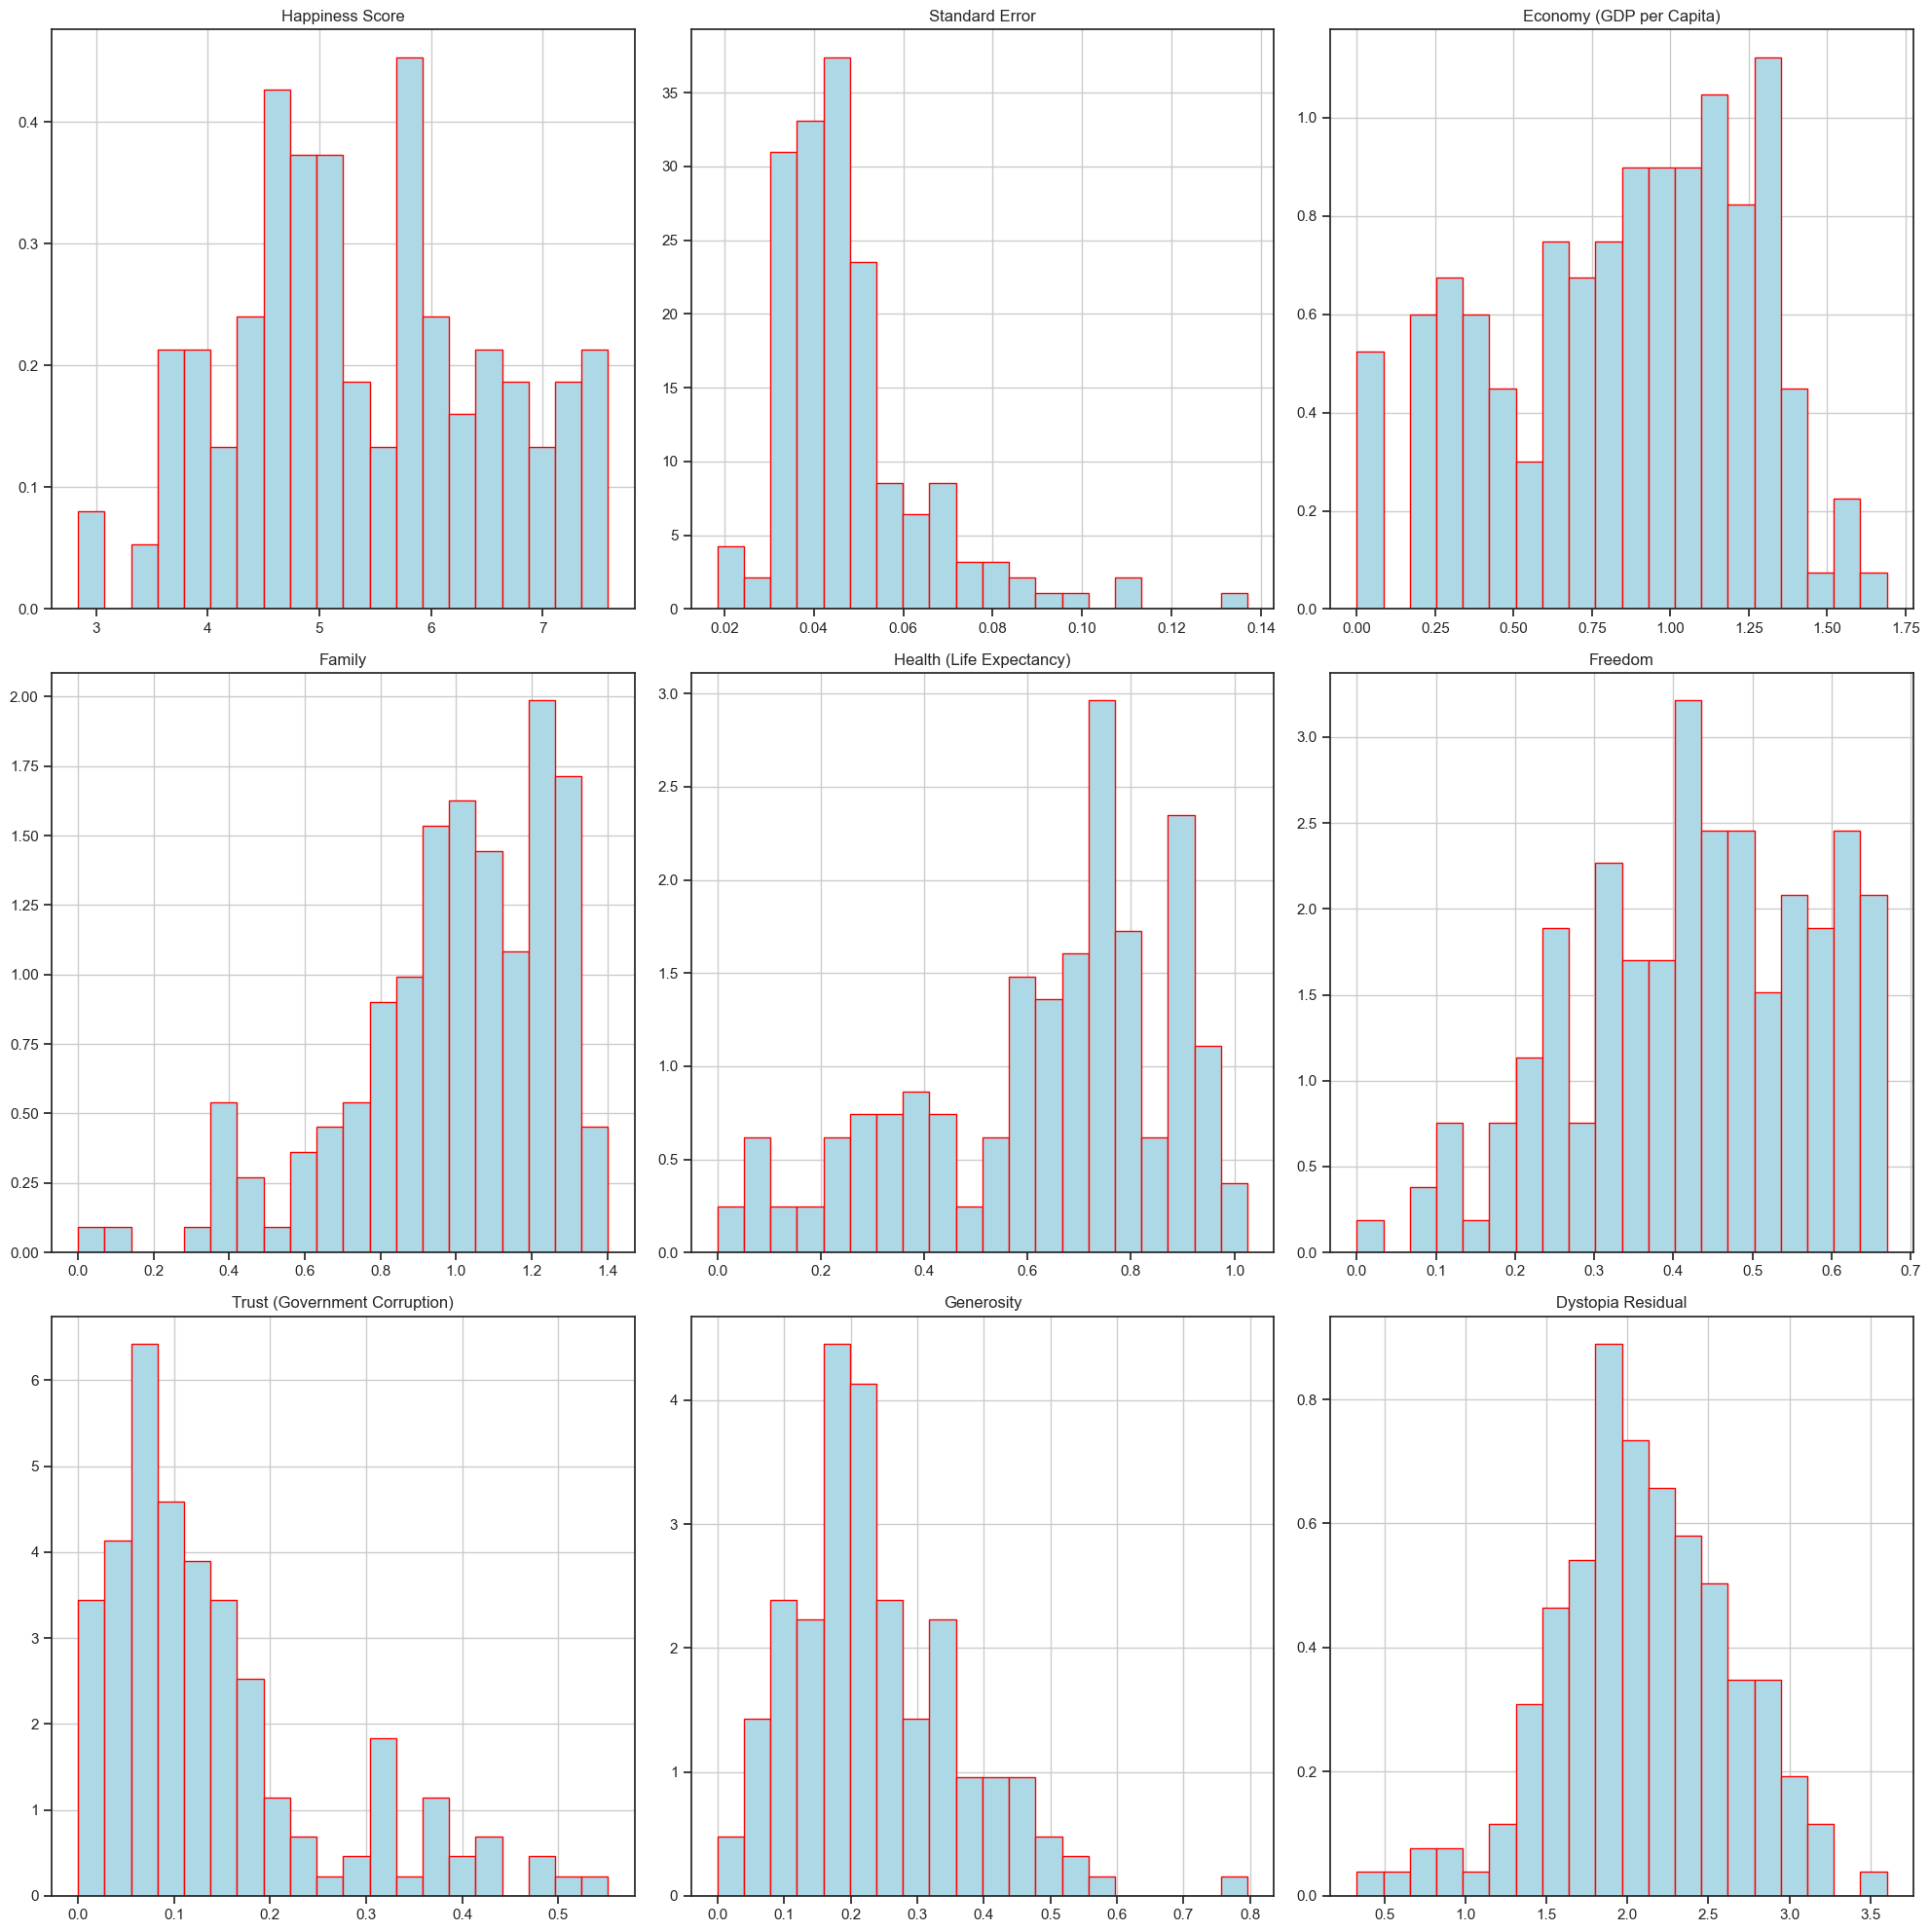

In [37]:
plt.rcParams['figure.figsize'] = (20,20)
data.hist(bins=20, color='lightblue', density=True, label='Value', histtype='bar',ec='red')
plt.tight_layout()
plt.show()

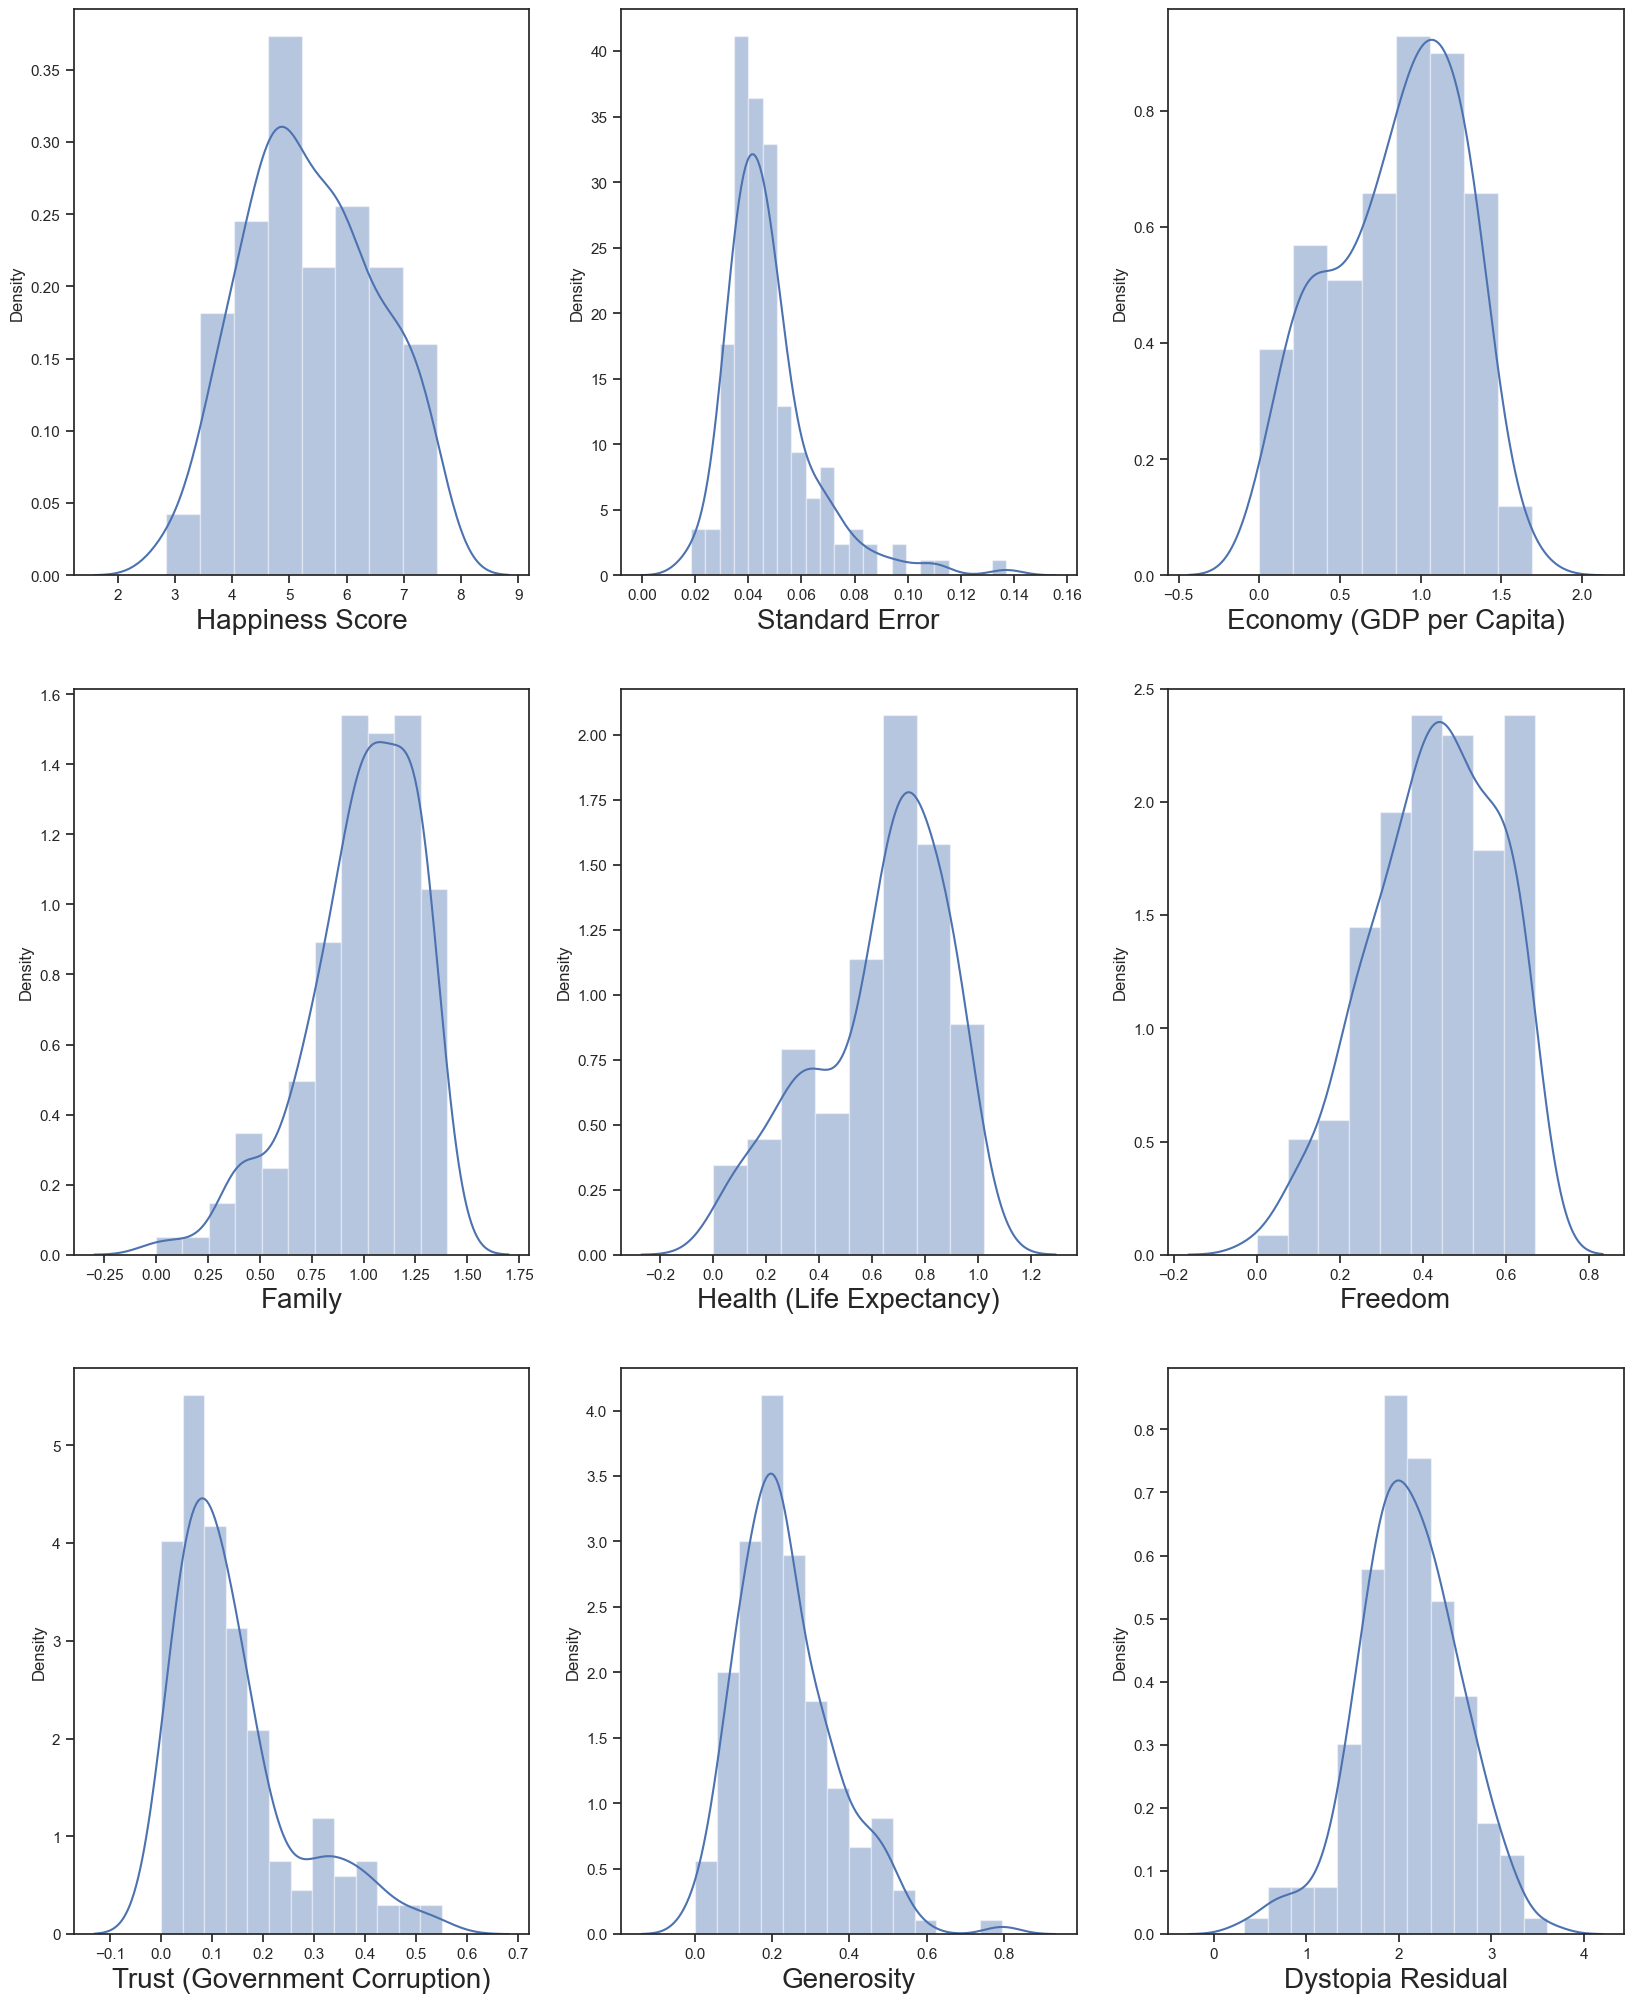

In [39]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in data.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Taking a look at the above Histogram and distplot we can see that there are columns with skewness and are not normally distributed. But we will confirm the same using the skew function on the data set.

In [40]:
data.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

**Observation:**

* Happiness_Score: The skewness value of 0.097769suggests a slightly positive skewness, indicating a slightly longer right tail.

* Standard_Error: The skewness value of 1.983439 indicates a significant positive skewness, suggesting a long right tail and a concentration of lower values.

* Economy_GDP_per_Capita: The skewness value of -0.317575 suggests a slightly negative skewness, indicating a slightly longer left tail.

* Family: The skewness value of -1.006893 indicates a significant negative skewness, suggesting a long left tail and a concentration of higher values.

* Health_Life_Expectancy: The skewness value of -0.705328 indicates a negative skewness, suggesting a longer left tail.

* Freedom: The skewness value of -0.413462 suggests a slightly negative skewness, indicating a slightly longer left tail.

* Trust_Government_Corruption: The skewness value of 1.385463 indicates a significant positive skewness, suggesting a long right tail and a concentration of lower values.

* Generosity: The skewness value of 1.001961 suggests a positive skewness, indicating a longer right tail.

* Dystopia_Residual: The skewness value of -0.238911 suggests a slightly negative skewness, indicating a slightly longer left tail.

**Drawing Box Plot to findout Outliers**

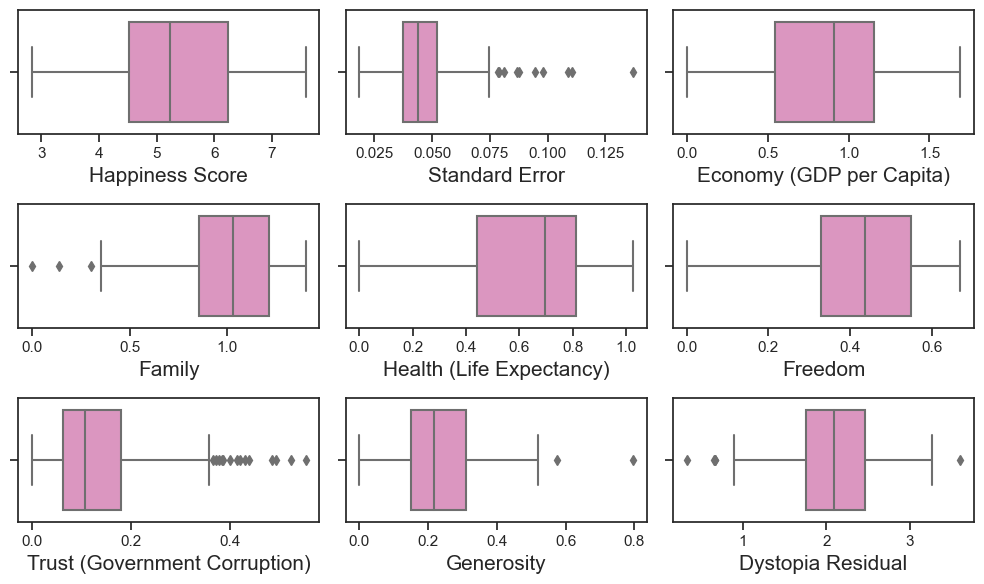

In [46]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in data.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)

        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

**Observation:**

* There are some outliers present in my dataset.

**Removing Outliers with the Help of Z score**

In [47]:
# Z score method

z=np.abs(zscore(data))
threshold=3
np.where(z>3)

data1=data[(z<3).all(axis=1)]
data1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


With the help of Z Score method we are able to detect the outliers and have removed them from our data set.

In [48]:
# Percentage of Data Loss

data_loss=(158-149)/158*100 # 158 was the number of rows in original data set and 149 after the removal of outliers
data_loss

5.69620253164557

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set after removing the outliers.

**Checking correlation**

In [49]:
data1.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard Error,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health (Life Expectancy),0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080
Generosity,0.250903,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239
Dystopia Residual,0.528334,0.045722,0.026936,0.118062,0.031212,0.058596,0.078080,-0.034239,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

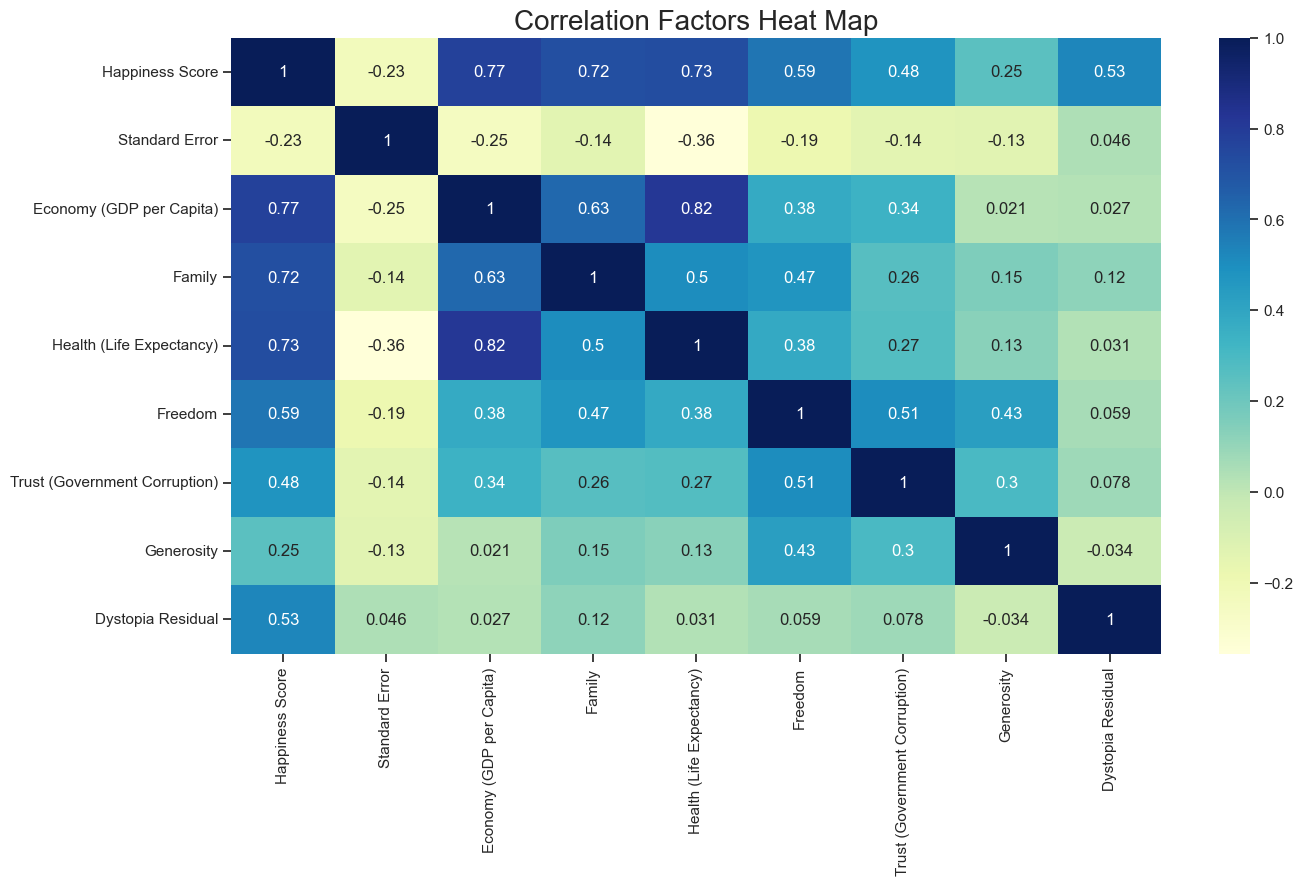

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

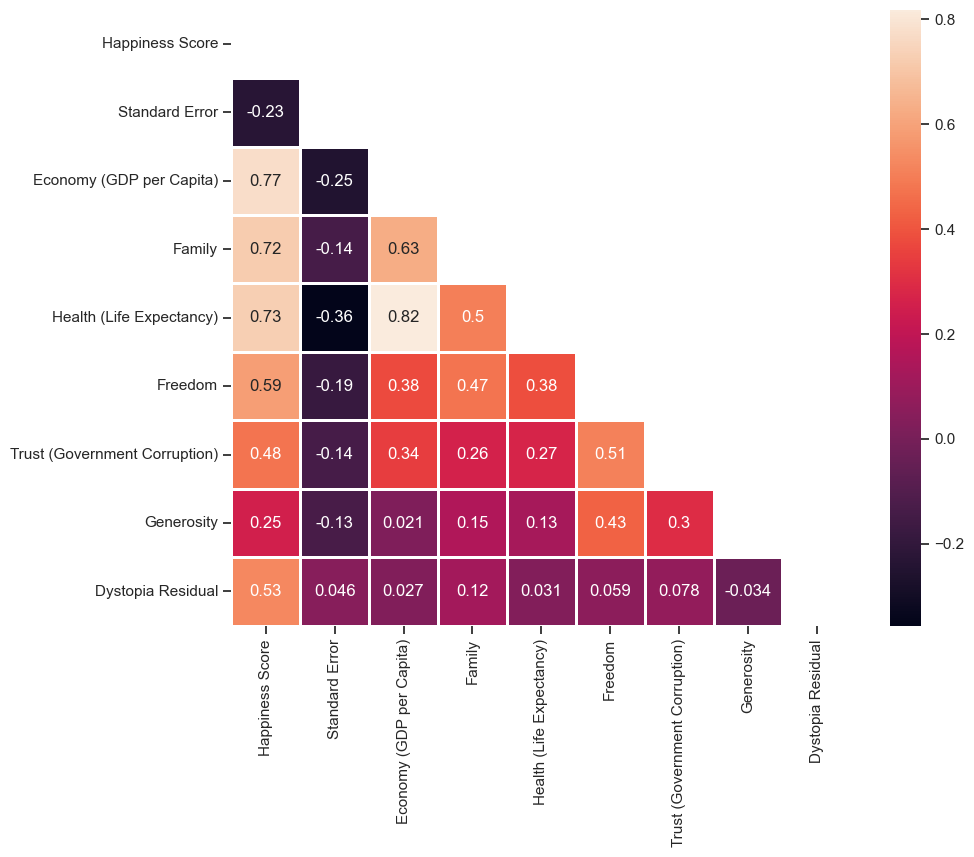

In [51]:
plt.figure(figsize=(10, 8))
matrix = np.triu(data1.corr())
sns.heatmap(data1.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [53]:
correlation_with_label = data1.corr()['Happiness Score'].abs().sort_values(ascending=False)
print(correlation_with_label)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.773577
Health (Life Expectancy)         0.729191
Family                           0.720868
Freedom                          0.585066
Dystopia Residual                0.528334
Trust (Government Corruption)    0.477692
Generosity                       0.250903
Standard Error                   0.230252
Name: Happiness Score, dtype: float64


All the columns are highly correlated with Target label

**Checking features correlation with features**

In [54]:
df_corr = data1.corr()
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [55]:
features_to_drop

{'Health (Life Expectancy)'}

Here it is clear that the Health_Life_Expectancy is highly (more than 80 %) correlated with Economy_GDP_per_Capita so we will drop Health_Life_Expectancy

In [57]:
data1 = data1.drop(['Health (Life Expectancy)'], axis=1)

In [58]:
data1.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


**Spliting Columns into features and Target label**

In [60]:
X = data1.drop('Happiness Score', axis=1) # List of all features
y = data1['Happiness Score'] # Data of our Target label

In [61]:
X

,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328


In [62]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

**Feature Scaling**

In [63]:
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.866786,1.381916,1.357879,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,0.379439,-0.533653,-0.409226,-0.930702


**Checking Best Random State**

In [64]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=i)
    gb=GradientBoostingRegressor(n_estimators=100)
    gb.fit(X_train,y_train)
    y_pred=gb.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9621648544967939 on Random_state 97


**Train Test Split**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=23)

**Model Training & Testing**

**Linear Regression**

In [66]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9942668463219303
MAE 0.07201539628184049


**Best fit line for linear regression**

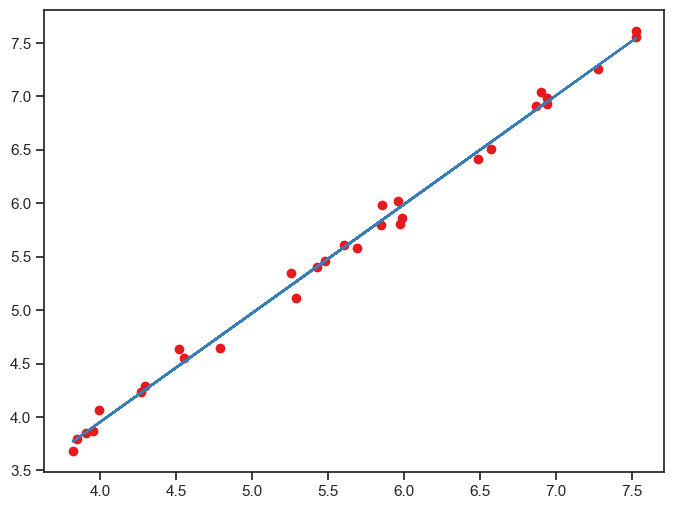

In [67]:
plt.rcParams['figure.figsize'] = (8, 6)
palette = "Set1"
sns.set_palette(palette)

plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b)

plt.show()

# Ridge Regression

In [68]:
R = Ridge(alpha=10)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9915070860723721
MAE 0.08481780116591943


# Lasso Regression

In [69]:
L = Lasso(alpha=0.001)
L.fit(X_train,y_train)
y_pred = L.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9943446014982706
MAE 0.07128693838892547


# Decision Tree Regressor

In [70]:
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8146881351438586
MAE 0.40963920634920653


# Random Forest Regressor

In [72]:
RF = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=10)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9234070092645572
MAE 0.241766110714286


# Extra Tree Regressor

In [73]:
ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=10,
                           bootstrap=True)

ET.fit(X_train,y_train)
y_pred = ET.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9276885736874863
MAE 0.24548270555555582


# Ada Boost Regressor

In [74]:
AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8891864696011749
MAE 0.30141440159933264


# Gradient Boosting Regressor

In [75]:
GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9590539356694505
MAE 0.18070365304081765


# XGB Regressor

In [76]:
XG = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.1)
XG.fit(X_train,y_train)
y_pred = XG.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9508439097458039
MAE 0.20368698991139722


# DataFrame of all The models

In [77]:
models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,
    'XGBoost': XG
}

results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)
    results_df_sorted = results_df.sort_values('R2 Score',ascending=False)

In [78]:
results_df_sorted

,Model,R2 Score,MAE
2,Lasso,0.994345,0.071287
0,Linear Regression,0.994267,0.072015
1,Ridge,0.991507,0.084818
7,Gradient Boosting,0.957928,0.178403
8,XGBoost,0.950844,0.203687
5,Extra Trees,0.927689,0.245483
4,Random Forest,0.923407,0.241766
6,AdaBoost,0.894603,0.289616
3,Decision Tree,0.813511,0.398048


Here we can say that 'Linear Regression', 'Lasso', 'Ridge' are looking overfitted so the 'Gradient Boosting ' is the best model we will save it for further prediction.

# Feature Importance

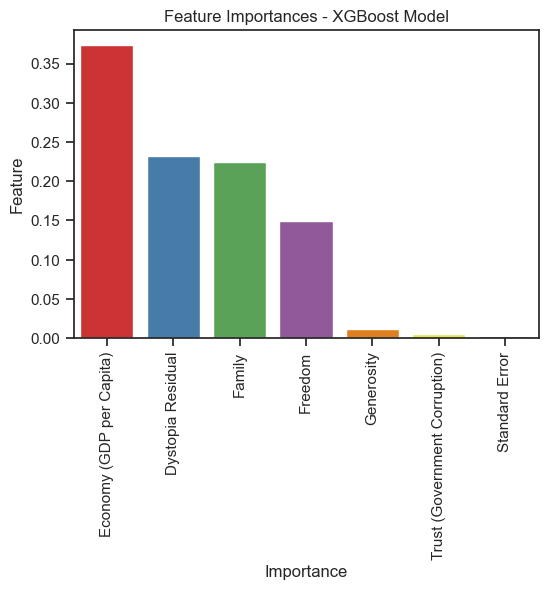

In [79]:
# Train the XGBoost model 
GB.fit(X_train, y_train)

importances = GB.feature_importances_
feature_names = X_train.columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()

Here we can see the importance of the feature in prediction

**Saving best model**

In [80]:
filename = 'GradientBoosting.pkl'
pickle.dump(GB, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))